In [9]:
import pandas as pd
import matplotlib.pyplot as plt
#reading the csv file and replacing all the 0 and '[]' with Nan
data = pd.read_csv("tmdb_5000_movies.csv", na_values=[0,'[]'])
len(data.columns)
data

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2.040920e+06,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238.0
4799,9000.0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,NaN,NaN,2011-12-26,NaN,85.0,NaN,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5.0
4800,NaN,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic..

In [10]:
#dropping columns which are not useful for analysis
data.drop(['homepage','id','keywords','original_title','overview','tagline'], axis = 1, inplace=True)
data.shape

(4803, 14)

In [11]:
#dropping rows with more than 3 null values
data = data.dropna(thresh=11)
data.shape

(4633, 14)

In [12]:
#dropping rows with no production companies 
data = data.dropna(subset=['production_companies'])
data = data.dropna(subset=['runtime']) #deleting the movies with no runtime!
data = data.dropna(subset=['runtime']) #deleting the movies with no runtime
data = data.dropna(subset=['production_countries'])#deleting the movies with no production_countries
data = data.dropna(subset=['spoken_languages'])#deleting the movies with no spoken languages
data['revenue']=data['revenue'].fillna(0)
data.shape
data.isnull().sum()

budget                  735
genres                    0
original_language         0
popularity                0
production_companies      0
production_countries      0
release_date              0
revenue                   0
runtime                   0
spoken_languages          0
status                    0
title                     0
vote_average              6
vote_count                6
dtype: int64

In [13]:
#creating a dataframe which stores the average budget of all the production companies

import pandas as pd
import json
import math
d = {}

def company_average(budget, companies):
    global d
    if math.isnan(budget):
        return
    
    data = json.loads(companies)
    per_company = budget/len(companies)
    
    for company in data:
        name = company['name']
        if name in d.keys():
            d[name]['total'] +=per_company
            d[name]['number'] +=1
            d[name]['total'] =d[name]['total']/d[name]['number']
        else:
            d[name]={'total':per_company, 'average': per_company, 'number':1}
    
for i in (data.index):
    company_average(data.loc[i,'budget'],data.loc[i,'production_companies'])
    
companies = pd.DataFrame(d).transpose()
companies

,total,average,number
Ingenious Film Partners,967.629818,1.167488e+06,27.0
Twentieth Century Fox Film Corporation,564.221068,1.167488e+06,209.0
Dune Entertainment,1349.540852,1.167488e+06,56.0
Lightstorm Entertainment,171555.478802,1.167488e+06,5.0
Walt Disney Pictures,359.266136,2.127660e+06,104.0
...,...,...,...
Strand Releasing,642.857143,6.428571e+02,1.0
Dreamland Productions,260.869565,2.608696e+02,1.0
Park Films,0.158537,1.585366e-01,1.0
Camera Stylo Films,0.158537,1.585366e-01,1.0


In [14]:
#using the companies dataframe to fill the rows with null budget with the sum of the averages of the companies' budget

import json

#number of null budget values before filling with average = 754
print(data[data['budget'].isna()].shape)

def get_average(data):
    
    comp = json.loads(data)
    budget = 0
    for i in comp:
        if i['name'] in companies.index:
            budget += companies.loc[i['name'],'average']
    return budget


for i in data[data['budget'].isna()].index:
    average = get_average(data.loc[i,'production_companies'])
    data.loc[i,'budget']= average

#number of null budget values after filling with average = 477    
data[data['budget'].isna()].shape

(735, 14)


(0, 14)

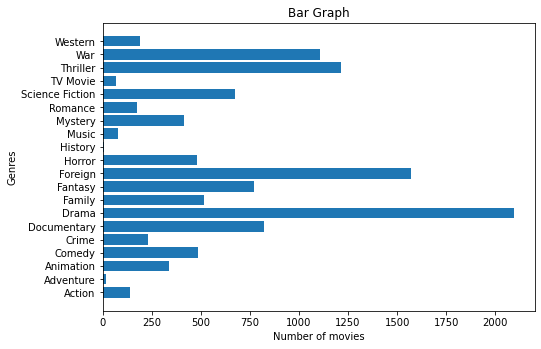

In [24]:
#bar graph
d1 = {}
arr=[]
def genrestotal(genre):
    global d1
    data = json.loads(genre)
    #per_company = budget/len(genre)
    for i in data:
        name = i['name']
        #if name in d.keys():
        arr.append(name)
for i in (data.index):
    genrestotal(data.loc[i,'genres'])
d1=set(arr)
arr
countarr=[]
counter=0;
for j in d1:
    for i in arr:
        if j==i:
            counter=counter+1;
    countarr.append(counter);
    counter=0;
countarr.reverse()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
genress = ['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy','Foreign','Horror','History','Music','Mystery','Romance','Science Fiction', 'TV Movie','Thriller','War','Western']
ax.barh(genress,countarr)
plt.title('Bar Graph')
plt.xlabel('Number of movies')
plt.ylabel('Genres')
plt.show()

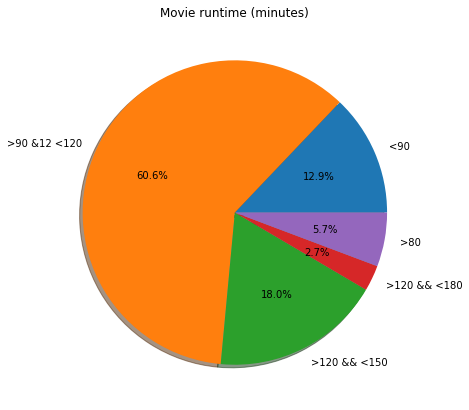

In [16]:
#pie graph
#freq,bins,patches=plt.hist(data['runtime']) histogram ( an alternative )
import matplotlib.pyplot as plt
import seaborn as sns
count1=0
count2=0
count3=0
count4=0
count5=0
for i in data['runtime']:
    if i<90:
        count1=count1+1;
    elif i>90 and i<120:
        count2=count2+1;
    elif i>120 and i<150:
        count3=count3+1;
    elif i>150 and i<180:
        count4=count4+1;
    else :
        count5=count5+1;
runtimes = ['<90', '>90 &12 <120','>120 && <150', 
        '>120 && <180', '>80'] 
  
rtdata= [count1,count2,count3,count4,count5] 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(rtdata, labels = runtimes, autopct='%1.1f%%', shadow=True) 
plt.title('Movie runtime (minutes)')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f55dd994eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55dd9265b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f55dd994b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f55dd926c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f55dd926f70>],
 'means': []}

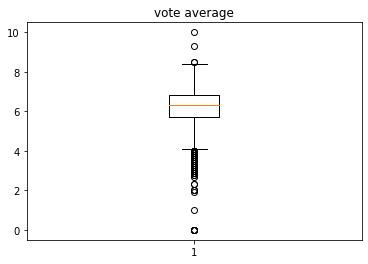

In [17]:
#box plot
data['vote_average']=data['vote_average'].fillna(0) #replace the 6 NaN values of voteaverage with 0 
data['vote_count']=data['vote_count'].fillna(0)
plt.title('vote average')
# print(data['vote_average'].describe())
plt.boxplot(data['vote_average'])


In [18]:
#normalization

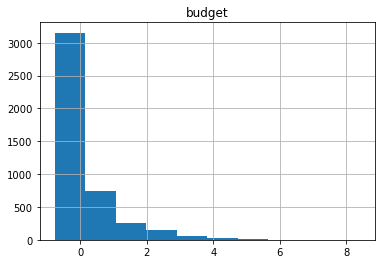

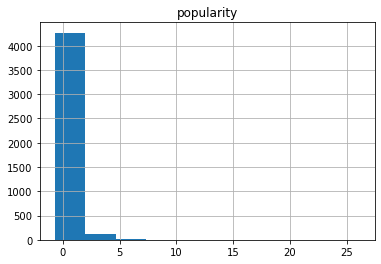

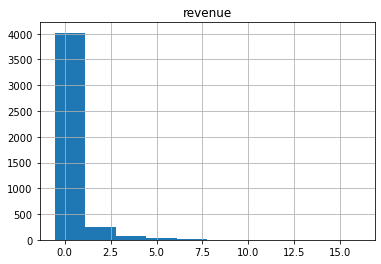

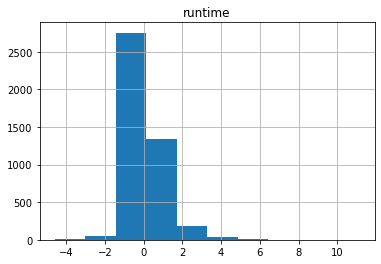

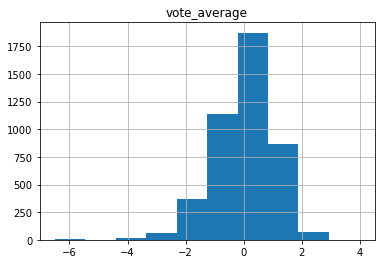

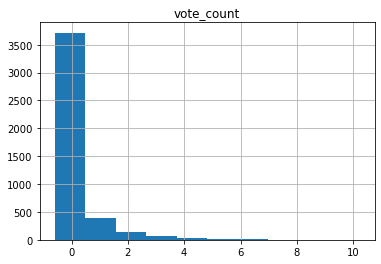

In [19]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']

def z_score(df):
    df_std = data.copy()
    for column in columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
    return df_std

df_standardised = z_score(data)
for column in columns:
    df_standardised[column].hist()
    plt.title(column)
    plt.show()

Text(0.5, 1.0, 'Vote Average')

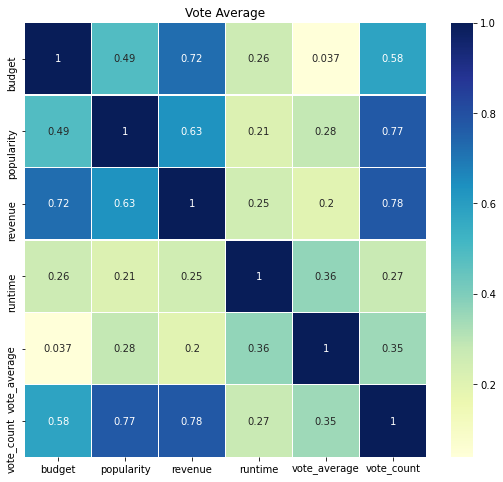

In [20]:
#correlation
corrmat = data.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,annot=True)
plt.title('Vote Average')

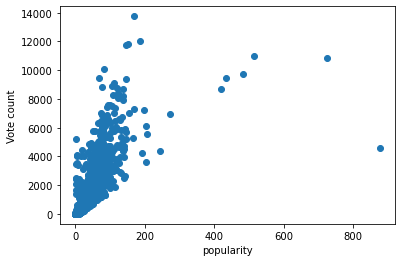

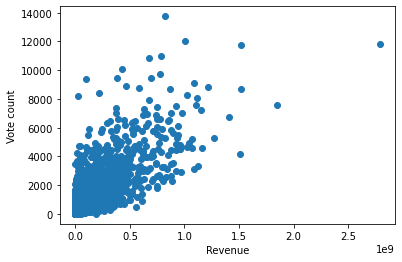

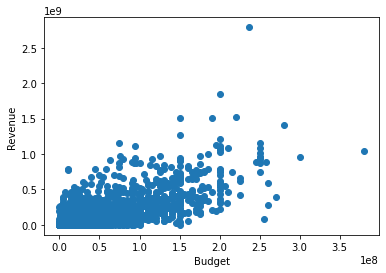

In [21]:
plt.scatter(data['popularity'],data['vote_count']) #vote count increases with the popularity
plt.xlabel('popularity')
plt.ylabel('Vote count')
plt.show()
plt.scatter(data['revenue'],data['vote_count']) #revenue increases with increase in vote_count 
plt.xlabel('Revenue')
plt.ylabel('Vote count')
plt.show()
plt.scatter(data['budget'],data['revenue'])#revenue increases with the budget 
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

In [22]:
#Hypothesis Testing -I
#If the budget of the movie is greater then 40 million , then the average runtime will be greater than 120 minutes.
#H0: u <= 120
#H1: u > 120

#To test the hypothesis , we use the z-score method
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

ztest, pval = stests.ztest(data.loc[data['budget'] > 40000000, 'runtime'], x2=None, value=120)
print("P-value = ")
print(float(pval))

if(pval < 0.05):
    print("Null Hypothesis is rejected.")
else:
    print("Null Hypothesis is plausible")


P-value = 
4.7601434505167394e-12
Null Hypothesis is rejected.


In [23]:
#Hypothesis Testing -II
#If the budget of the movie is greater then 40 million , then the vote average will be greater than 6.2
#H0: u <= 6.2
#H1: u > 6.2

import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

ztest, pval = stests.ztest(data.loc[data['budget'] > 40000000 , 'vote_average'], x2=None,value=6.2041865756541466)

print("P-value = ")
print(float(pval))

if(pval < 0.05):
    print("Null Hypothesis is rejected.")
else:
    print("Null Hypothesis is plausible")


P-value = 
0.7523976537064129
Null Hypothesis is plausible
